# **Admission Prediction Using ML**

# DATASET
The given dataset is related to admission 
prediction using machine learning. The dataset 
includes the GRE(graduate record examination) Score, TOEFL(Test of English as a Foreign Language) Score, 
University Rating, Statement of Purpose (SOP), 
Letter of Recommendation (LOR), Undergraduate 
GPA (CGPA), Research experience, and the 
Chance of Admit. The dataset consists of 400 rows and i9 columns 
, and the admission chance is a 
continuous value between 0 and 1(for classification), representing 
the probability of admission. The dataset is used 
to predict the chances of a student getting 
admitted to a university based on the provided 
features. The goal of this project is to use machine 
learning algorithms to analyze the data and 
predict the likelihood of admission for future 
students

In [528]:
import pandas as pd

In [529]:
data = pd.read_csv('Admission_Predict.csv')

### 1. Display Top 5 Rows of The Dataset

In [530]:
data.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### 2. Check Last 5 Rows of The Dataset

In [531]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [532]:
data.shape

(400, 9)

In [533]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 400
Number of Columns 9


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### 5.Check Null Values In The Dataset

In [535]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [536]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### 7. Dropping Irrelevant Features

In [537]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [538]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [539]:
data = data.drop('Serial No.',axis=1)

In [540]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [541]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [542]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [543]:
X = data.drop('Chance of Admit ',axis=1)

In [544]:
y = data['Chance of Admit ']

### 9. Splitting The Dataset Into The Training Set And Test Set

In [545]:
from sklearn.model_selection import train_test_split

In [546]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [547]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

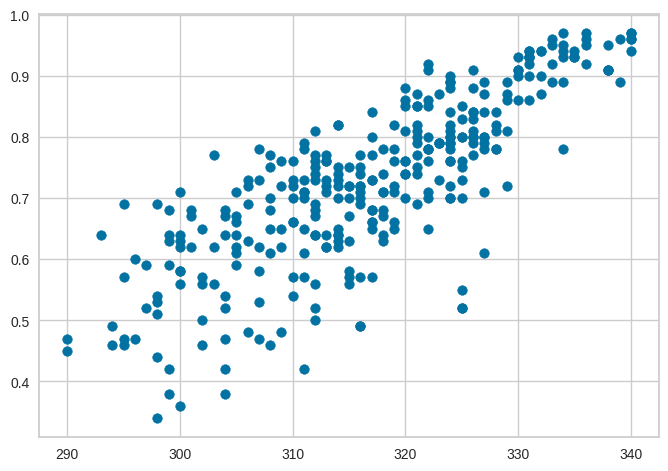

In [548]:
import matplotlib.pyplot as plt

plt.scatter(X_train['GRE Score'],y_train)

In [549]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<ipython-input-550-4fbd67fce7a0>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['CGPA'], shade=True)


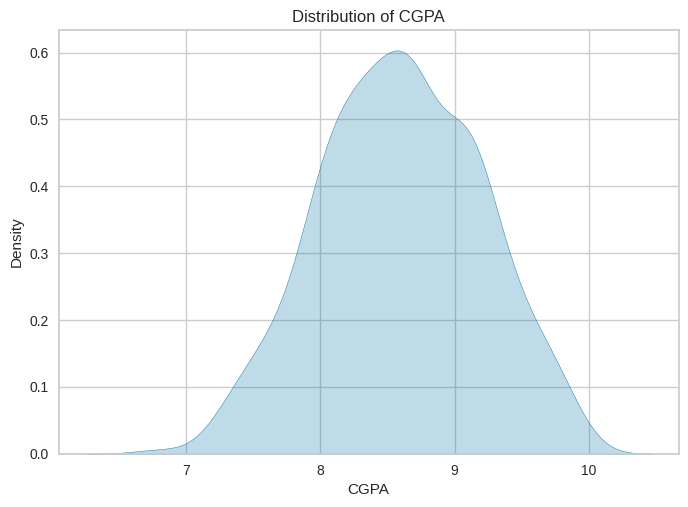

In [550]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(data=data['CGPA'], shade=True)

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.title('Distribution of CGPA')

# Show the plot
plt.show()

### 10. Feature Scaling

In [551]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [552]:
# find the maximum value in the first row
max_value = data.iloc[0].max()
print('Maximum value in the first row:', max_value)

# find the minimum value in the first row
min_value = data.iloc[0].min()
print('Minimum value in the first row:', min_value)

Maximum value in the first row: 337.0
Minimum value in the first row: 0.92


In [553]:
from sklearn.preprocessing import StandardScaler


In [554]:
sc = StandardScaler()

In [555]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [556]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [557]:
import numpy as np
X_test=np.array(X_test)

In [558]:
X_test

array([[-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
        -0.79612211,  0.92761259],
       [-0.51865083, -0.90435307, -0.057308  ,  1.10763663,  0.61348253,
         0.08881255,  0.92761259],
       [ 2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,  0.61348253,
         1.72253809,  0.92761259],
       [ 0.72322823,  0.09240806,  0.81595675,  1.10763663,  0.61348253,
         0.80356748,  0.92761259],
       [-1.4057073 , -1.73498736, -0.93057275, -0.36308421, -0.50194025,
        -1.2045535 ,  0.92761259],
       [ 2.05381293,  1.25529606,  1.6892215 ,  1.10763663,  1.17119391,
         1.46726848,  0.92761259],
       [-1.76052989, -1.90111421, -0.93057275, -0.85332449, -2.17507441,
        -1.18753552, -1.07803625],
       [-1.22829601, -1.40273364, -0.057308  , -1.34356476, -1.05965163,
        -1.57894893, -1.07803625],
       [-0.42994518, -0.40597251, -0.93057275, -1.34356476, -1.05965163,
        -0.23452896, -1.07803625],
       [ 0.54581693,  0.9230

### 11. Import The models

In [559]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### 12. Model Training

In [560]:
lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [561]:
y_train.shape

(320,)

In [562]:
y_test.shape

(80,)

In [563]:
y_pred=lr.predict(X_test)

In [564]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))


0.004617003377285012


In [565]:
from sklearn.metrics  import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8212082591486991
0.04795673362091202


In [566]:
X_test[0]

array([-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
       -0.79612211,  0.92761259])

In [567]:
y[0]

0.92

In [568]:
from sklearn.linear_model import LinearRegression

# assuming X and y are the input features and target variable respectively
model = LinearRegression()
model.fit(X, y)

# get the coefficients and intercept of the linear regression equation
coefficients = model.coef_
intercept = model.intercept_

# print the equation in the form y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7
equation = 'y = {:.2f}'.format(intercept)
for i in range(len(coefficients)):
    equation += ' + {:.2f}*x{}'.format(coefficients[i], i+1)
print('Linear regression equation:', equation)


Linear regression equation: y = -1.26 + 0.00*x1 + 0.00*x2 + 0.01*x3 + -0.00*x4 + 0.02*x5 + 0.12*x6 + 0.02*x7


In [615]:
data[9:11]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
9,323,108,3,3.5,3.0,8.6,0,0.45
10,325,106,3,3.5,4.0,8.4,1,0.52


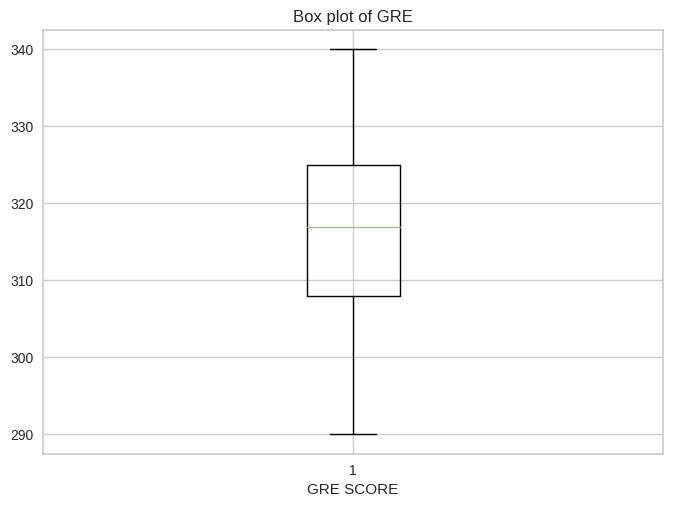

In [569]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe with the given data


# create a box plot for the CGPA feature
plt.boxplot(data['GRE Score'])

# Add labels and title
plt.xlabel('GRE SCORE')
plt.title('Box plot of GRE')

# Show the plot
plt.show()


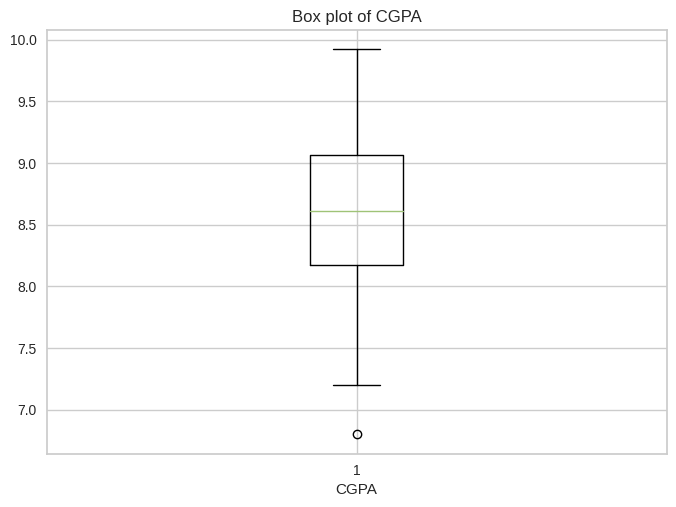

In [570]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe with the given data


# create a box plot for the CGPA feature
plt.boxplot(data['CGPA'])

# Add labels and title
plt.xlabel('CGPA')
plt.title('Box plot of CGPA')

# Show the plot
plt.show()


In [571]:
# find the 0th and 100th percentiles for the 'CGPA' column
percentiles = np.percentile(data['CGPA'], [0, 100])

# print the percentiles
print("0th percentile:", percentiles[0])
print("100th percentile:", percentiles[1])

0th percentile: 6.8
100th percentile: 9.92


In [572]:
data['CGPA'] = data['CGPA'].astype(float)
mean_cgpa = data['CGPA'].mean()


def replace_outliers_with_mean(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    mean_val = data[col].mean()
    data.loc[data[col] > upper_bound, col] = mean_val
    data.loc[data[col] < lower_bound, col] = mean_val
    return data

# replace the values greater than 2 in the 'CGPA' column with the mean value
data = replace_outliers_with_mean(data, 'CGPA')



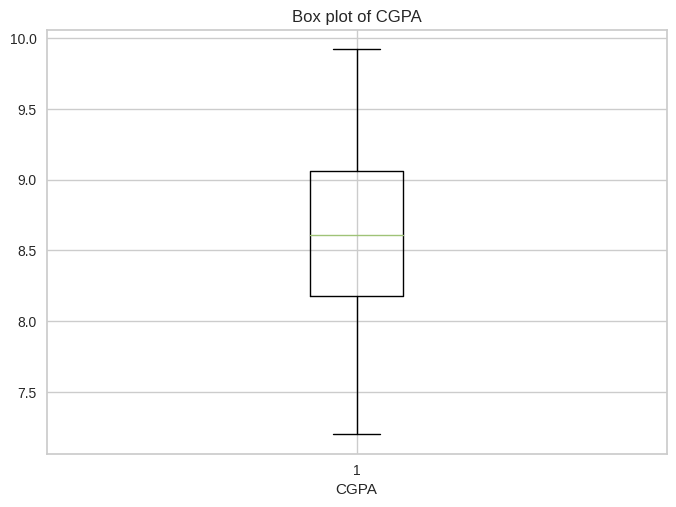

In [573]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe with the given data


# create a box plot for the CGPA feature
plt.boxplot(data['CGPA'])

# Add labels and title
plt.xlabel('CGPA')
plt.title('Box plot of CGPA')

# Show the plot
plt.show()


### 14. Evaluating the Algorithm

In [574]:
from sklearn import metrics

In [575]:
score1 = metrics.r2_score(y_test,y_pred)


In [576]:
print(score1)

0.8212082591486991


In [577]:
final_data = pd.DataFrame({'Models':['LR'],
                          'R2_SCORE':[score1]})

In [578]:
final_data

,Models,R2_SCORE
0,LR,0.821208


In [579]:
import seaborn as sns

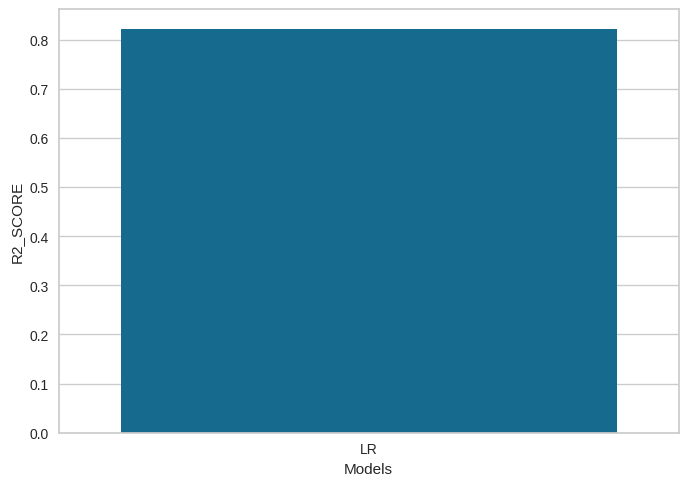

In [580]:
# sns.barplot(final_data['Models'],final_data['R2_SCORE'])
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Models', y='R2_SCORE', data=final_data)
plt.show()


# Classification

In [581]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [582]:
import numpy as np

In [583]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [584]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

### 15. Import The models

In [585]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score

### 16. Model Training & Evaluation

In [586]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1= lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.925


In [587]:
from sklearn.metrics  import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))

0.6754563894523327
0.075


In [588]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Create a logistic regression model object
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred1 = lr.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred1)

print("Precision: {:.2f}".format(precision))
# Calculate recall
recall = recall_score(y_test, y_pred1)

print("Recall: {:.2f}".format(recall))


Precision: 0.96
Recall: 0.83


In [589]:
print(data.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [590]:


import pandas as pd
from sklearn.linear_model import LogisticRegression

# load your dataset into a pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# define your input features X and target variable y
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Chance of Admit ']

# convert y to binary values
y_binary = y.apply(lambda x: 1 if x > 0.8 else 0)

# create an instance of the logistic regression model
logreg = LogisticRegression()

# fit the model to your dataset
logreg.fit(X, y_binary)

# predict the binary class labels for each input sample
labels = logreg.predict(X)

# print the predicted labels
print(labels)
 

[1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [591]:
import numpy as np

# get the coefficients and intercept of the logistic regression model
coef = logreg.coef_[0]
intercept = logreg.intercept_[0]

# create a list of feature names
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

# print the logistic equation
print('log(odds) = {:.2f} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{}'.format(
    intercept,
    coef[0], feature_names[0],
    coef[1], feature_names[1],
    coef[2], feature_names[2],
    coef[3], feature_names[3],
    coef[4], feature_names[4],
    coef[5], feature_names[5],
    coef[6], feature_names[6]
))

# print the logistic equation with the sigmoid function
print('P(y=1 | x) = 1 / (1 + exp(-({:.2f} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{} + {:.2f}*{})))'.format(
    intercept,
    coef[0], feature_names[0],
    coef[1], feature_names[1],
    coef[2], feature_names[2],
    coef[3], feature_names[3],
    coef[4], feature_names[4],
    coef[5], feature_names[5],
    coef[6], feature_names[6]
))


log(odds) = -0.74 + -0.17*GRE Score + 0.19*TOEFL Score + 1.06*University Rating + 0.30*SOP + 0.29*LOR + 2.82*CGPA + 2.26*Research
P(y=1 | x) = 1 / (1 + exp(-(-0.74 + -0.17*GRE Score + 0.19*TOEFL Score + 1.06*University Rating + 0.30*SOP + 0.29*LOR + 2.82*CGPA + 2.26*Research)))


In [592]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.8875


In [593]:
final_data = pd.DataFrame({'Models':['LR','KNN'],
                           'ACC_SCORE':[accuracy_score(y_test,y_pred1),
                                       accuracy_score(y_test,y_pred3),
                                      ]})

In [594]:
from sklearn.metrics  import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred3))
print(mean_absolute_error(y_test,y_pred3))

0.513184584178499
0.1125


In [595]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Use the classifier to make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


Precision: 0.92
Recall: 0.76


In [596]:
final_data

,Models,ACC_SCORE
0,LR,0.9250
1,KNN,0.8875


In [597]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# # Load your data into a pandas DataFrame
# # data = pd.read_csv('your_dataset.csv')

# # Define your input features X
# X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]

# # Instantiate the KMeans model
# model = KMeans()

# # Instantiate the KElbowVisualizer with the KMeans model
# visualizer = KElbowVisualizer(model, k=(2, 10))

# # Fit the visualizer to your data
# visualizer.fit(X)

# # Plot the visualizer
# visualizer.show()

In [598]:
## logistic regression

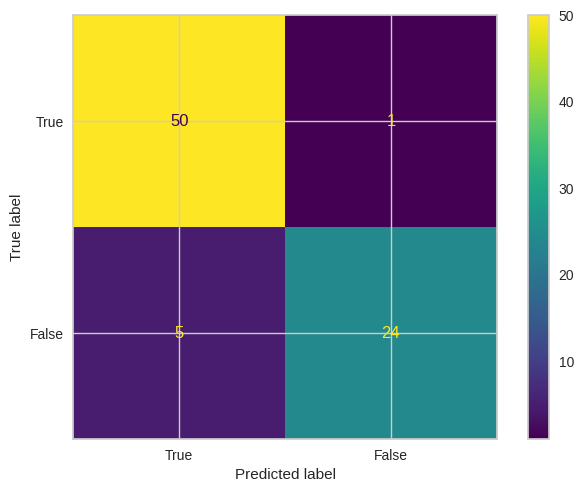

In [612]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

### for knn classifier

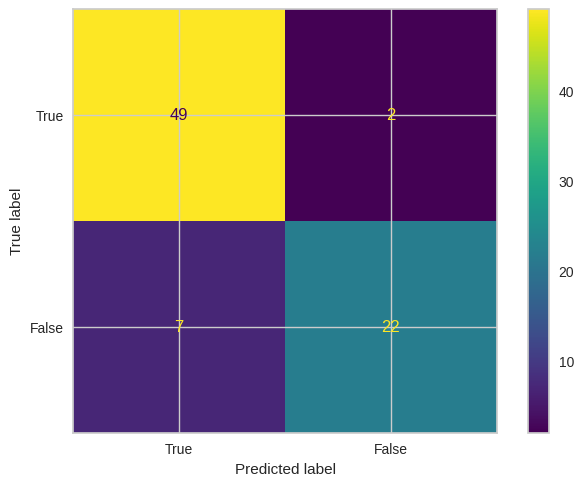

In [613]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

In [601]:
import seaborn as sns

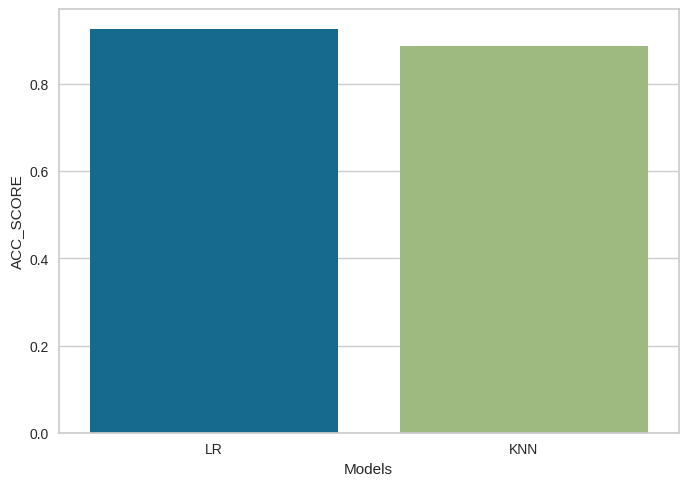

In [602]:
# sns.barplot(final_data['Models'],final_data['ACC_SCORE'])
sns.barplot(x='Models', y='ACC_SCORE', data=final_data)
plt.show()

### 17. Save The Model

In [603]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [604]:
X = data.drop('Chance of Admit ',axis=1)

In [605]:
y = data['Chance of Admit ']

In [606]:
y  = [1 if value>0.8 else 0 for value in y]

In [607]:
y = np.array(y)

In [608]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [609]:
X = sc.fit_transform(X)

In [610]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.77770876,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.4528068 ,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.02496847,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.43799031,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.29993349, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.79469468,  0.90911166]])

In [611]:
lr.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])